# Universidad del Valle de Guatemala
# Data Science - Sección: 10
## Integrantes
### Mario Guerra - 21008
### Javier Alvarado - 21188

# Ejercicio 1

In [22]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob

## Carga de Archivo

In [3]:
# Descargar recursos de NLTK si no están disponibles
nltk.download('stopwords')
nltk.download('punkt_tab')

# Cargar los datos desde el archivo CSV
train_file = pd.read_csv("train.csv")

print(train_file)

# Información básica del dataset
print(train_file.info())

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mague\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mague\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Limpieza y Preprocesamiento de Datos

In [4]:
# Función para limpiar el texto de los tweets
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Quitar URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Quitar caracteres especiales y puntuación
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenización
    words = word_tokenize(text)
    # Quitar stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_text = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_text)

# Aplicar la función de limpieza a la columna de texto
train_file['clean_text'] = train_file['text'].apply(clean_text)

# Mostrar las primeras filas con el texto limpio
print(train_file[['text', 'clean_text']].head())

train_file.to_csv("train-cleaned.csv")

                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                          clean_text  
0       deeds reason earthquake may allah forgive us  
1              forest fire near la ronge sask canada  
2  residents asked shelter place notified officer...  
3  people receive wildfires evacuation orders cal...  
4  got sent photo ruby alaska smoke wildfires pou...  


## Frecuencia en las Palabras de Tweets de Desastre

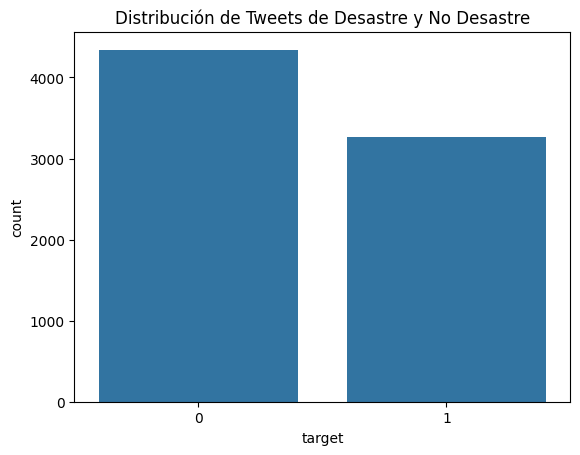

In [5]:
# Revisar la distribución de la variable objetivo
sns.countplot(x='target', data=train_file)
plt.title('Distribución de Tweets de Desastre y No Desastre')
plt.show()

## Análisis Exploratorio

In [7]:
from nltk.probability import FreqDist
from wordcloud import WordCloud


# Cargar los datos desde el archivo CSV
train_file = pd.read_csv("train-cleaned.csv")

# Separar los tweets por categoría
disaster_tweets = train_file[train_file['target'] == 1]
non_disaster_tweets = train_file[train_file['target'] == 0]

# Unir todos los textos en cada categoría
all_words_disaster = ' '.join(disaster_tweets['clean_text'])
all_words_non_disaster = ' '.join(non_disaster_tweets['clean_text'])

# Crear frecuencias de palabras
fdist_disaster = FreqDist(all_words_disaster.split())
fdist_non_disaster = FreqDist(all_words_non_disaster.split())

# Mostrar las 10 palabras más comunes en cada categoría
print("Palabras más comunes en tweets de desastres:")
print(fdist_disaster.most_common(10))

print("\nPalabras más comunes en tweets de no desastres:")
print(fdist_non_disaster.most_common(10))


Palabras más comunes en tweets de desastres:
[('fire', 180), ('news', 140), ('via', 121), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 107), ('people', 105), ('killed', 93)]

Palabras más comunes en tweets de no desastres:
[('like', 253), ('im', 248), ('amp', 193), ('new', 170), ('get', 163), ('dont', 154), ('one', 128), ('body', 113), ('via', 99), ('would', 97)]


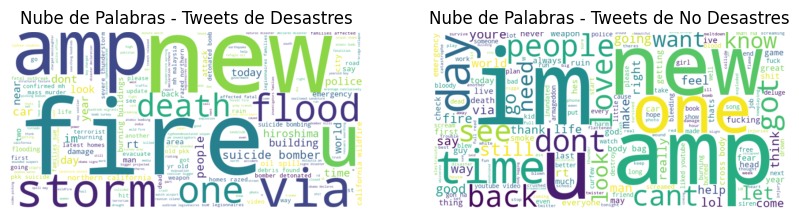

In [8]:
# Crear una nube de palabras para cada categoría
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(all_words_disaster)
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='white').generate(all_words_non_disaster)

# Mostrar las nubes de palabras
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title('Nube de Palabras - Tweets de Desastres')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title('Nube de Palabras - Tweets de No Desastres')
plt.axis('off')

plt.show()

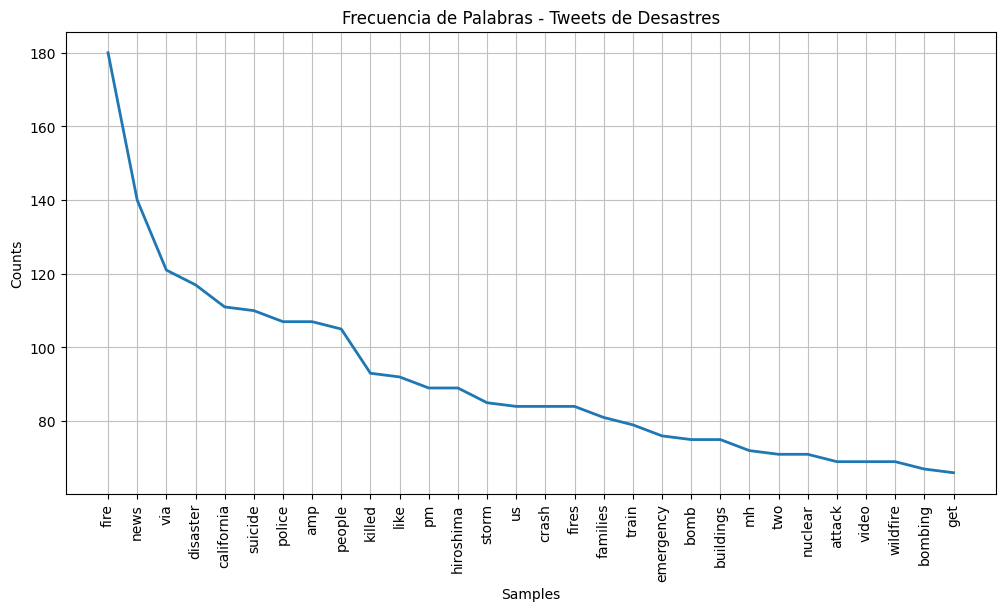

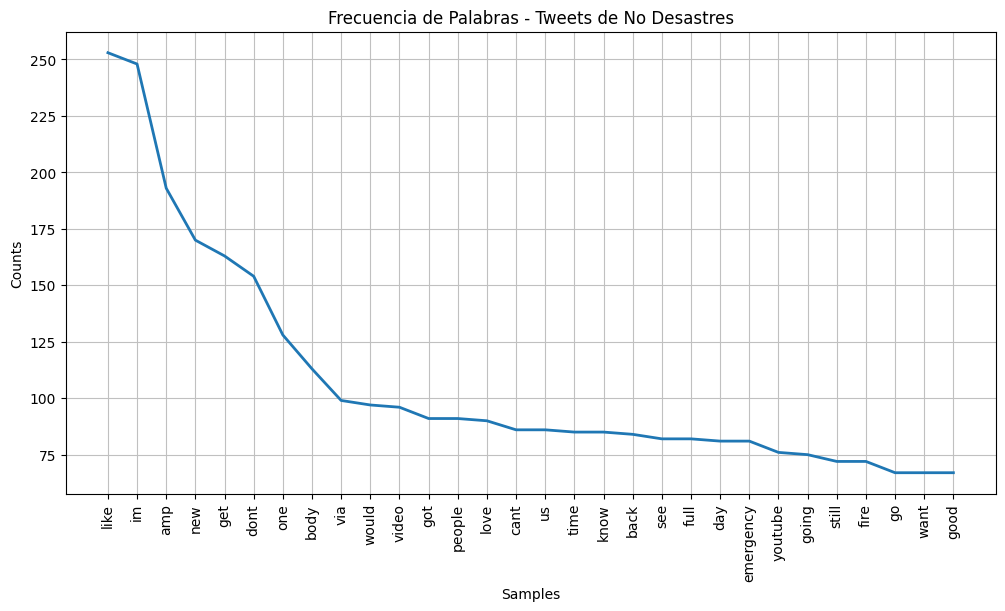

In [9]:
# Crear un histograma de las palabras más comunes en tweets de desastre
plt.figure(figsize=(12, 6))
fdist_disaster.plot(30, title='Frecuencia de Palabras - Tweets de Desastres')
plt.show()

# Crear un histograma de las palabras más comunes en tweets de no desastre
plt.figure(figsize=(12, 6))
fdist_non_disaster.plot(30, title='Frecuencia de Palabras - Tweets de No Desastres')
plt.show()

In [10]:
# Obtener palabras comunes entre las dos categorías
common_words = set(fdist_disaster.keys()).intersection(set(fdist_non_disaster.keys()))

print("Palabras comunes entre ambas categorías:")
print(common_words)

Palabras comunes entre ambas categorías:
{'plants', 'stewart', 'purse', 'cricket', 'battery', 'sto', 'chewing', 'last', 'middle', 'cow', 'lizards', 'dudes', 'worstsummerjob', 'union', 'al', 'shift', 'rejected', 'pathogen', 'cnews', 'evacuation', 'alabama', 'talkradio', 'photography', 'arms', 'suffering', 'fires', 'q', 'cover', 'iran', 'yankees', 'biggest', 'core', 'usa', 'expect', 'afghanistan', 'fragile', 'oth', 'footage', 'joint', 'fuel', 'lifted', 'rape', 'vehicle', 'gon', 'german', 'barely', 'done', 'points', 'client', 'australia', 'davidvonderhaar', 'ie', 'afterlife', 'network', 'official', 'would', 'week', 'respect', 'knew', 'officials', 'biological', 'magginoodle', 'mudslide', 'angels', 'many', 'un', 'hand', 'voting', 'haram', 'female', 'streets', 'state', 'rd', 'requiring', 'deserves', 'gang', 'suppose', 'cafe', 'officer', 'twia', 'specially', 'admits', 'condition', 'american', 'contain', 'ik', 'silence', 'obliterated', 'idps', 'vine', 'code', 'conditions', 'chases', 'daily', '

In [29]:
# Determinar las palabras positivas, negativas y neutras
def get_word_sentiment(word):
    """Determina el sentimiento de una palabra usando TextBlob."""
    analysis = TextBlob(word)
    return analysis.sentiment.polarity

# Calcular el puntaje de sentimiento para cada tweet
train_file['sentiment_score'] = train_file['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [30]:
# Clasificar los tweets como Positivo, Negativo o Neutro basado en el puntaje de sentimiento
train_file['sentiment'] = train_file['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

In [32]:
# Mostrar los primeros registros con los resultados de sentimientos
print(train_file[['clean_text', 'sentiment', 'sentiment_score']].head(50))

                                           clean_text sentiment  \
0        deeds reason earthquake may allah forgive us   Neutral   
1               forest fire near la ronge sask canada  Positive   
2   residents asked shelter place notified officer...  Negative   
3   people receive wildfires evacuation orders cal...   Neutral   
4   got sent photo ruby alaska smoke wildfires pou...   Neutral   
5   rockyfire update california hwy closed directi...  Negative   
6   flood disaster heavy rain causes flash floodin...  Negative   
7                          im top hill see fire woods  Positive   
8   theres emergency evacuation happening building...   Neutral   
9                       im afraid tornado coming area  Negative   
10                    three people died heat wave far  Positive   
11  haha south tampa getting flooded hah wait seco...  Positive   
12  raining flooding florida tampabay tampa days i...   Neutral   
13                    flood bago myanmar arrived bago   Neutra

C:\Users\mague\AppData\Local\Temp\ipykernel_30548\3409809614.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


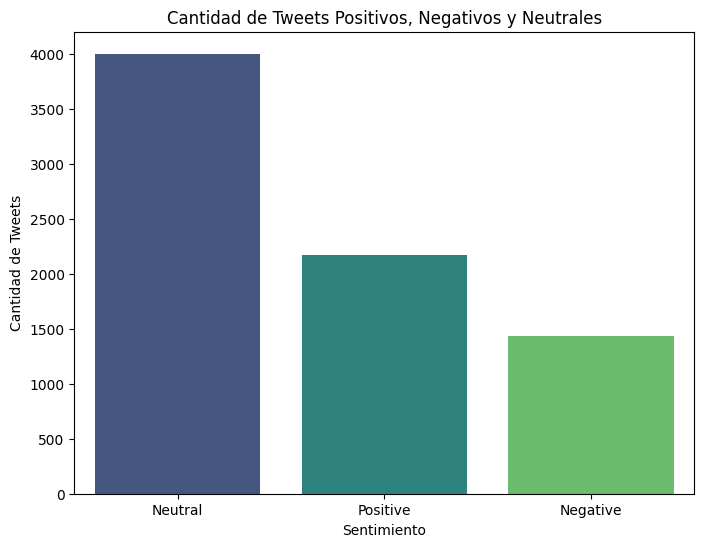

In [34]:
# Contar la cantidad de tweets positivos, negativos y neutrales
sentiment_counts = train_file['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Cantidad de Tweets Positivos, Negativos y Neutrales')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.show()

## Determinar qué tan positivo, negativo o neutral es un tweet.

In [41]:
# Mostrar los primeros registros con los resultados de sentimientos
print(train_file[['clean_text', 'sentiment_score']].head(50))

                                           clean_text  sentiment_score
0        deeds reason earthquake may allah forgive us         0.000000
1               forest fire near la ronge sask canada         0.100000
2   residents asked shelter place notified officer...        -0.100000
3   people receive wildfires evacuation orders cal...         0.000000
4   got sent photo ruby alaska smoke wildfires pou...         0.000000
5   rockyfire update california hwy closed directi...        -0.112500
6   flood disaster heavy rain causes flash floodin...        -0.200000
7                          im top hill see fire woods         0.500000
8   theres emergency evacuation happening building...         0.000000
9                       im afraid tornado coming area        -0.600000
10                    three people died heat wave far         0.100000
11  haha south tampa getting flooded hah wait seco...         0.112121
12  raining flooding florida tampabay tampa days i...         0.000000
13    

## Determinar tweets más negativos y positivos.

In [45]:
most_negative_tweets = train_file.sort_values(by='sentiment_score').head(10)
print("\n10 tweets más negativos:")
print(most_negative_tweets[['clean_text', 'target']])

most_positive_tweets = train_file.sort_values(by='sentiment_score', ascending=False).head(10)
print("\n10 tweets más positivos:")
print(most_positive_tweets[['clean_text',  'target']])

# Calcular la negatividad media de cada categoría
disaster_mean_negativity = train_file[train_file['target'] == 1]['sentiment_score'].mean()
non_disaster_mean_negativity = train_file[train_file['target'] == 0]['sentiment_score'].mean()

print(f"\nNegatividad media de tweets de desastre: {disaster_mean_negativity}")
print(f"Negatividad media de tweets de no desastre: {non_disaster_mean_negativity}")

if disaster_mean_negativity < non_disaster_mean_negativity:
    print("Los tweets de la categoría de desastre son más negativos en promedio.")
else:
    print("Los tweets de la categoría de no desastre son más negativos en promedio.")


10 tweets más negativos:
                                             clean_text  target
1797  destinythegame bungie playstation getting kick...       0
4904  gigagil iof murdered palestinian children gaza...       1
6244  cacheadvance besides nasty thunderstorm snowst...       0
501   envw nickcocofree juliedicaro jdabe worst pers...       0
3856  see devastation amp shocking firefighters cont...       1
4134     grow calgary avoids worst citys wicked weather       1
2410  update nopassenger metro train derails causing...       1
1164  ashes australias collapse trent bridge among w...       1
3557  russia destroys food people go hungry ones ins...       1
7195               abcnews nuclear bomb terrible weapon       1

10 tweets más positivos:
                                             clean_text  target
2349                  demolitiond best grill u fkn pleb       0
6270  looks like perfect stormfree evening coming ch...       1
1426  whimsy pertains mass casualties always impress

## Modelos de clasificación implementados con la negatividad de cada tweet.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack

In [47]:
X = train_file[['clean_text', 'sentiment_score']]  # Incluimos 'sentiment_score' como característica
y = train_file['target']

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización de texto
vectorizer = TfidfVectorizer(max_features=5000)  # Puedes ajustar el número de características
X_train_text_vect = vectorizer.fit_transform(X_train['clean_text'])
X_test_text_vect = vectorizer.transform(X_test['clean_text'])

In [48]:
# Convertir la columna 'sentiment_score' a formato de array 2D
X_train_sentiment = X_train[['sentiment_score']].values
X_test_sentiment = X_test[['sentiment_score']].values

# Combinar la vectorización de texto con la "negatividad" de cada tweet
X_train_combined = hstack([X_train_text_vect, X_train_sentiment])
X_test_combined = hstack([X_test_text_vect, X_test_sentiment])

In [50]:
# Crear una lista de modelos para probar
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC(),
}

# Entrenar y evaluar cada modelo con la característica adicional
for model_name, model in models.items():
    model.fit(X_train_combined, y_train)
    y_pred = model.predict(X_test_combined)
    print(f"Resultados para {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("\n")

Resultados para Logistic Regression:
Accuracy: 0.7997373604727511
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523



Resultados para Random Forest:
Accuracy: 0.7669074195666448
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       874
           1       0.76      0.66      0.71       649

    accuracy                           0.77      1523
   macro avg       0.77      0.75      0.76      1523
weighted avg       0.77      0.77      0.76      1523



Resultados para Support Vector Machine:
Accuracy: 0.7964543663821405
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       874
           1       0.83      0.66     

# Ejercicio 2

## Carga del archivo y limpieza y procesamiento de los datos.

In [51]:
reviews_train_file = pd.read_csv("GrammarandProductReviews.csv")
print(reviews_train_file.head())
print(reviews_train_file.info())

                     id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                         

In [52]:
# Aplicar la función de limpieza a la columna de texto
reviews_train_file['clean_text'] = reviews_train_file['reviews.text'].apply(lambda x: clean_text(str(x)))

# Mostrar las primeras filas con el texto limpio
print(reviews_train_file[['reviews.text', 'clean_text']].head())

                                        reviews.text  \
0  i love this album. it's very good. more to the...   
1  Good flavor. This review was collected as part...   
2                                       Good flavor.   
3  I read through the reviews on here before look...   
4  My husband bought this gel for us. The gel cau...   

                                          clean_text  
0  love album good hip hop side current pop sound...  
1        good flavor review collected part promotion  
2                                        good flavor  
3  read reviews looking buying one couples lubric...  
4  husband bought gel us gel caused irritation fe...  


## Análisis Exploratorio

In [ ]:
# Código aquí.

## Determinar qué tan positivo, negativo o neutral es una review.

In [ ]:
# Código aquí.

## Análisis sobre las reviews positivas y negativas.

In [ ]:
# Código aquí.

## Análisis sobre productos con más malas reseñas.

In [ ]:
# Código aquí.